In [6]:
import re, time
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from IPython.display import clear_output

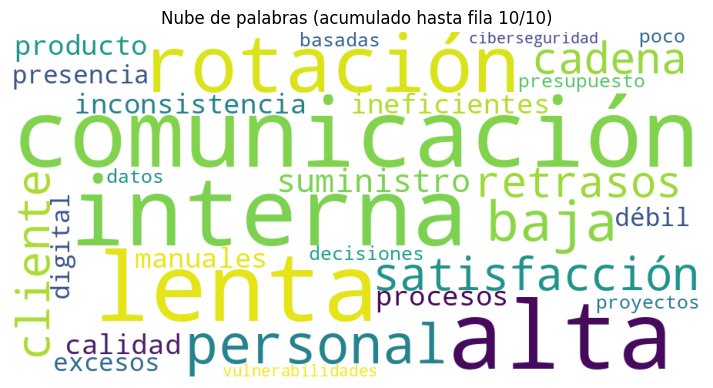

In [5]:
df = pd.read_csv("data/company_problems.csv")

# --- 2) Simple tokenizer ---
# --- 2) Stopwords: base + palabras comunes en español ---
stop_es = {
    "de","la","el","los","las","y","o","u","a","en","del","al","por","para","con","sin",
    "un","una","unos","unas","lo","le","les","se","su","sus","es","son","ser","esta","está",
    "están","muy","más","menos","ya","no","sí","que","como","sobre"
}
stop = set(STOPWORDS) | stop_es

# --- 3) Tokenizador simple ---
def tokenizar(texto):
    palabras = re.findall(r"[a-záéíóúñü]+", str(texto).lower())
    return [w for w in palabras if w not in stop and len(w) > 2]

# --- 4) Parámetros de visualización ---
modo = "acumulado"   # opciones: "acumulado" o "por_fila"
pausa_s = 0.8        # segundos entre fotogramas

wc = WordCloud(width=900, height=450, background_color="white")
conteo_acum = Counter()

# --- 5) Bucle de actualización ---
for i, row in df.iterrows():
    tokens = tokenizar(row["problema"])
    if modo == "acumulado":
        conteo_acum.update(tokens)
        freqs = conteo_acum
        titulo = f"Nube de palabras (acumulado hasta fila {i+1}/{len(df)})"
    else:  # "por_fila"
        freqs = Counter(tokens)
        titulo = f"Nube de palabras (solo fila {i+1}/{len(df)})"

    if not freqs:
        continue

    clear_output(wait=True)
    plt.figure(figsize=(9, 4.5))
    plt.imshow(wc.generate_from_frequencies(freqs))
    plt.axis("off")
    plt.title(titulo)
    plt.show()

    time.sleep(pausa_s)